In [1]:
import numpy as np
import scipy.sparse as sparse
import matplotlib.pyplot as plt

In [7]:
import partial_inverse as pinv

# Create an arbitrary sparse matrix for testing

In [2]:
n = 10000  # Size of the matrix (n x n)
bandwidth = 50  # Number of diagonals to populate near the main diagonal

# Generate random values for the diagonals
diagonals = []
offsets = []

# Fill the main diagonal and nearby diagonals
for offset in range(-bandwidth, bandwidth + 1):
    values = np.random.random(n - abs(offset))  # Random values for the diagonal
    diagonals.append(values)
    offsets.append(offset)

# Create the sparse matrix in CSC format
Q = sparse.diags(diagonals, offsets, shape=(n, n), format="csc")
# Ensure the matrix is positive definite
Q = sparse.csc_matrix(np.dot(Q.toarray(), Q.toarray().T))

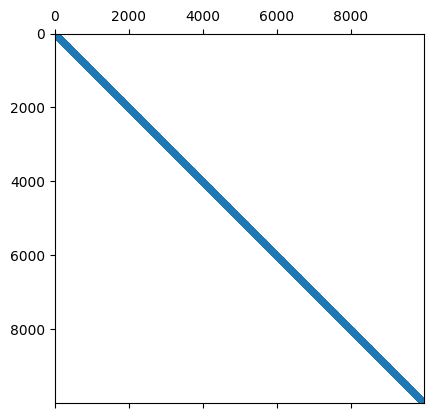

In [3]:
plt.spy(Q, markersize=0.1)

# Calculate the true inverse

In [5]:
%%time
Qinv_true = sparse.linalg.inv(Q)

CPU times: user 18.5 s, sys: 3.22 s, total: 21.8 s
Wall time: 22.8 s


# Calculate the partial inverse

In [9]:
%%time
Qinv_partial_inverse = pinv.pinv(Q)

CPU times: user 2.85 s, sys: 52.6 ms, total: 2.9 s
Wall time: 2.91 s


# Verify the matrices are the same (at least very similar)

In [15]:
Qinv_true.toarray()[:3, :3]

array([[ 58551.93196092, -61928.83285784, -64644.57292522],
       [-61928.83284843,  65640.40336012,  68356.32910263],
       [-64644.57293208,  68356.32912029,  71494.09054191]])

In [16]:
Qinv_partial_inverse.toarray()[:3, :3]

array([[ 58551.933032  , -61928.83396378, -64644.5741248 ],
       [-61928.83396378,  65640.4045114 ,  68356.33035205],
       [-64644.5741248 ,  68356.33035205,  71494.09187759]])

Looks good to me!